In [1]:
import numpy as np
import pandas as pd

## Data Exploration

In [2]:
df = pd.read_csv("Data/titanic_train.csv")
df_test = pd.read_csv("Data/titanic_test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing

In [12]:
df = df.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)
test = df_test.drop(['PassengerId','Ticket','Name', 'Cabin'],axis=1)

In [56]:
df['Age'] = df['Age'].fillna(0)
test = test.fillna(0)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,0.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
df['Family'] = df['SibSp'] + df['Parch']
test['Family'] = test['SibSp'] + test['Parch']

In [17]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X = pd.get_dummies(X, drop_first=True);

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [20]:
scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)
scaler.transform(X_test)

array([[-1.56832452e+00,  1.23713390e+00, -4.83483830e-01,
        -4.74526647e-01, -7.48838708e-02, -5.68463349e-01,
         7.45211249e-01, -2.99659671e-01,  6.13423720e-01],
       [-1.56832452e+00, -3.40361622e-01,  4.32049380e-01,
        -4.74526647e-01,  4.08584656e+00,  5.18897063e-02,
        -1.34190138e+00, -2.99659671e-01, -1.63019454e+00],
       [-1.56832452e+00, -2.82998149e-01,  4.32049380e-01,
        -4.74526647e-01,  4.39393072e-01,  5.18897063e-02,
         7.45211249e-01, -2.99659671e-01,  6.13423720e-01],
       [ 8.24490604e-01, -1.02872330e+00, -4.83483830e-01,
         7.47646485e-01, -4.09895579e-01,  5.18897063e-02,
         7.45211249e-01, -2.99659671e-01,  6.13423720e-01],
       [-3.71916957e-01, -1.37290414e+00, -4.83483830e-01,
        -4.74526647e-01, -6.70692525e-01, -5.68463349e-01,
         7.45211249e-01, -2.99659671e-01,  6.13423720e-01],
       [ 8.24490604e-01,  1.03636174e+00, -4.83483830e-01,
        -4.74526647e-01, -5.12855495e-01, -5.684633

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR = LogisticRegression(max_iter = 10000)

In [23]:
LR.fit(X_train , y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_pred = LR.predict(X_test)

In [25]:
from sklearn.metrics import plot_confusion_matrix, classification_report

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


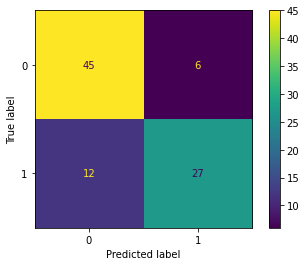

In [26]:
plot_confusion_matrix(LR,X_test,y_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



### Support Vector Machine

In [28]:
from sklearn.svm import SVC

In [29]:
SVC = SVC(max_iter = 100000, C=10)

In [30]:
SVC.fit(X_train, y_train)

SVC(C=10, max_iter=100000)

In [31]:
y_pred = SVC.predict(X_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


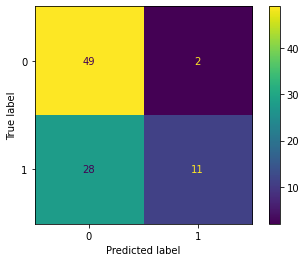

In [32]:
plot_confusion_matrix(SVC, X_test, y_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        51
           1       0.85      0.28      0.42        39

    accuracy                           0.67        90
   macro avg       0.74      0.62      0.59        90
weighted avg       0.73      0.67      0.62        90



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RFC = RandomForestClassifier(n_estimators=100, max_depth = 10)

In [36]:
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [37]:
y_pred = RFC.predict(X_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


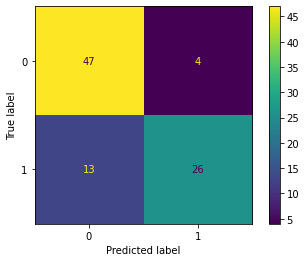

In [38]:
plot_confusion_matrix(RFC, X_test, y_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        51
           1       0.87      0.67      0.75        39

    accuracy                           0.81        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.81      0.81        90



In [40]:
RFC.fit(X,y)

RandomForestClassifier(max_depth=10)

In [41]:
submission = pd.read_csv("Data/gender_submission.csv")

In [42]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0
414,1,female,39.0,0,0,108.9000,C,0
415,3,male,38.5,0,0,7.2500,S,0
416,3,male,NaN,0,0,8.0500,S,0


In [43]:
test = pd.get_dummies(test, drop_first = True)


In [58]:
sub = RFC.predict(test)

In [60]:
submission = pd.DataFrame({"PassengerId" : df_test["PassengerId"], 'Survived':sub})

In [61]:
submission.to_csv("submission.csv",index=False)